<a href="https://colab.research.google.com/github/inusah4/AI4CCEE_Adnan44/blob/main/mini_project/Adnan_miniproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries
import pandas as pd

# Load the CSV files
accident_18 = pd.read_csv('accident_18.csv', encoding='ISO-8859-1')
accident_19 = pd.read_csv('accident_19.csv', encoding='ISO-8859-1', low_memory=False)
accident_20 = pd.read_csv('accident_20.csv', encoding='ISO-8859-1')
accident_21 = pd.read_csv('accident_21.csv', encoding='ISO-8859-1')
accident_22 = pd.read_csv('accident_22.csv', encoding='ISO-8859-1')

vehicle_18 = pd.read_csv('vehicle_18.csv', encoding='ISO-8859-1', low_memory=False)
vehicle_19 = pd.read_csv('vehicle_19.csv', encoding='ISO-8859-1', low_memory=False)
vehicle_20 = pd.read_csv('vehicle_20.csv', encoding='ISO-8859-1', low_memory=False)
vehicle_21 = pd.read_csv('vehicle_21.csv', encoding='ISO-8859-1', low_memory=False)
vehicle_22 = pd.read_csv('vehicle_22.csv', encoding='ISO-8859-1', low_memory=False)

# Convert columns to numeric, setting errors='coerce' will turn non-numeric values into NaN
accident_19.iloc[:, 40] = pd.to_numeric(accident_19.iloc[:, 40], errors='coerce')
accident_19.iloc[:, 42] = pd.to_numeric(accident_19.iloc[:, 42], errors='coerce')

# Combine datasets
acc_df = pd.concat([accident_18, accident_19, accident_20, accident_21, accident_22], ignore_index=True)
veh_df = pd.concat([vehicle_18, vehicle_19, vehicle_20, vehicle_21, vehicle_22], ignore_index=True)

# Check the combined DataFrame
print(acc_df.head())
print(veh_df.head())

   STATE STATENAME  ST_CASE  VE_TOTAL  VE_FORMS  PVH_INVL  PEDS  PERSONS  \
0      1   Alabama    10001         2         1         1     0        1   
1      1   Alabama    10002         1         1         0     0        2   
2      1   Alabama    10003         2         2         0     0        2   
3      1   Alabama    10004         1         1         0     0        2   
4      1   Alabama    10005         2         2         0     0        2   

   PERMVIT  PERNOTMVIT  ...  HOSP_MN                        HOSP_MNNAME   CF1  \
0        1           0  ...       88   Not Applicable (Not Transported)   0.0   
1        2           0  ...       88   Not Applicable (Not Transported)  20.0   
2        2           0  ...       99  Unknown EMS Hospital Arrival Time   0.0   
3        2           0  ...       88   Not Applicable (Not Transported)   0.0   
4        2           0  ...       88   Not Applicable (Not Transported)   0.0   

                   CF1NAME  CF2  CF2NAME  CF3 CF3NAME  F

In [ ]:
# Select only the relevant columns from the accident DataFrame
selected_columns_acc = [
    'STATE', 'STATENAME', 'ST_CASE', 'FUNC_SYS', 'ROUTE', 'ROUTENAME', 'LATITUDE', 'LONGITUD', 'MAN_COLL', 'WRK_ZONE', 'VE_TOTAL', 'PEDS', 'PERSONS',
    'PERMVIT', 'PERNOTMVIT', 'RUR_URB', 'TYP_INT', 'LGT_COND', 'WEATHERNAME', 'DAY', 'MONTH', 'YEAR', 'HOUR', 'MINUTE', 'DAY_WEEKNAME', 'DRUNK_DR', 'FATALS'
]
new_acc_df = acc_df[selected_columns_acc]

In [ ]:
# Select only the relevant columns from the vehicles DataFrame
selected_columns_veh = [
    'ST_CASE', 'VEH_NO', 'NUMOCCS', 'BODY_TYP', 'V_CONFIG', 'M_HARM', 'VSURCOND', 'VPAVETYP', 'ACC_TYPE', 'VPROFILE', 'VTRAFCON',
]
new_veh_df = veh_df[selected_columns_veh]

In [ ]:
# Perform a join on the 'ST_CASE' column
total_df = pd.merge(new_acc_df, new_veh_df, on='ST_CASE', how='inner')

# Check the combined DataFrame
print(total_df.head())

   STATE STATENAME  ST_CASE  FUNC_SYS  ROUTE   ROUTENAME   LATITUDE  \
0      1   Alabama    10001         1      1  Interstate  33.591331   
1      1   Alabama    10001         1      1  Interstate  33.591331   
2      1   Alabama    10001         1      1  Interstate  33.591331   
3      1   Alabama    10001         1      1  Interstate  33.591331   
4      1   Alabama    10001         1      1  Interstate  33.591331   

    LONGITUD  MAN_COLL  WRK_ZONE  ...  VEH_NO  NUMOCCS  BODY_TYP  V_CONFIG  \
0 -86.131869         0         0  ...       1        1        66         6   
1 -86.131869         0         0  ...       1        2         4         0   
2 -86.131869         0         0  ...       2        1        64         1   
3 -86.131869         0         0  ...       1        4         4         0   
4 -86.131869         0         0  ...       1        2        14         0   

   M_HARM  VSURCOND  VPAVETYP  ACC_TYPE VPROFILE  VTRAFCON  
0       1         1         2        11    

In [ ]:
# Filter rows where 'state' equals 19 [IOWA] and 'func_sys' is in [2, 3, 4]
iowa_df = total_df[(total_df['STATE'] == 19) & (total_df['FUNC_SYS'].isin([2, 3, 4]))]

In [ ]:
# Get the number of rows
num_rows = iowa_df.shape[0]

print(f"Number of rows in acc_df: {num_rows}")

Number of rows in acc_df: 5476


In [ ]:
# Get the total number of missing values in the DataFrame
total_missing = iowa_df.isnull().sum().sum()

# Display the total number of missing values
print(f"Total missing values: {total_missing}")

Total missing values: 2214


In [ ]:
# Display the list of columns in iowa_df
columns_list = iowa_df.columns
print(columns_list)

Index(['STATE', 'STATENAME', 'ST_CASE', 'FUNC_SYS', 'ROUTE', 'ROUTENAME',
       'LATITUDE', 'LONGITUD', 'MAN_COLL', 'WRK_ZONE', 'VE_TOTAL', 'PEDS',
       'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'RUR_URB', 'TYP_INT', 'LGT_COND',
       'WEATHERNAME', 'DAY', 'MONTH', 'YEAR', 'HOUR', 'MINUTE', 'DAY_WEEKNAME',
       'DRUNK_DR', 'FATALS', 'VEH_NO', 'NUMOCCS', 'BODY_TYP', 'V_CONFIG',
       'M_HARM', 'VSURCOND', 'VPAVETYP', 'ACC_TYPE', 'VPROFILE', 'VTRAFCON'],
      dtype='object')


In [ ]:
# Get the number of missing values per column
missing_by_column = iowa_df.isnull().sum()

# Display missing values by column
print(missing_by_column)

STATE              0
STATENAME          0
ST_CASE            0
FUNC_SYS           0
ROUTE              0
ROUTENAME          0
LATITUDE           0
LONGITUD           0
MAN_COLL           0
WRK_ZONE           0
VE_TOTAL           0
PEDS               0
PERSONS            0
PERMVIT            0
PERNOTMVIT         0
RUR_URB            0
TYP_INT            0
LGT_COND           0
WEATHERNAME        0
DAY                0
MONTH              0
YEAR               0
HOUR               0
MINUTE             0
DAY_WEEKNAME       0
DRUNK_DR        2214
FATALS             0
VEH_NO             0
NUMOCCS            0
BODY_TYP           0
V_CONFIG           0
M_HARM             0
VSURCOND           0
VPAVETYP           0
ACC_TYPE           0
VPROFILE           0
VTRAFCON           0
dtype: int64


In [ ]:
# Create DataFrame for Kernel Density
# Select only the necessary columns (latitude and longitude)
location_df = iowa_df[['STATE', 'ST_CASE', 'FUNC_SYS', 'YEAR', 'ROUTE', 'ROUTENAME', 'MONTH', 'DAY_WEEKNAME', 'LATITUDE', 'LONGITUD']]

# Display the filtered and selected columns
print(location_df.head())

        STATE  ST_CASE  FUNC_SYS  YEAR  ROUTE     ROUTENAME  MONTH  \
482507     19   190001         3  2019      2  U.S. Highway      1   
482508     19   190001         3  2019      2  U.S. Highway      1   
482509     19   190001         3  2019      2  U.S. Highway      1   
482510     19   190001         3  2019      2  U.S. Highway      1   
482511     19   190001         3  2019      2  U.S. Highway      1   

       DAY_WEEKNAME   LATITUDE   LONGITUD  
482507    Wednesday  42.836219 -95.151183  
482508    Wednesday  42.836219 -95.151183  
482509    Wednesday  42.836219 -95.151183  
482510    Wednesday  42.836219 -95.151183  
482511    Wednesday  42.836219 -95.151183  


In [ ]:
# Get a concise summary of the DataFrame, including non-null counts
location_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5476 entries, 482507 to 1302104
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         5476 non-null   int64  
 1   ST_CASE       5476 non-null   int64  
 2   FUNC_SYS      5476 non-null   int64  
 3   YEAR          5476 non-null   int64  
 4   ROUTE         5476 non-null   int64  
 5   ROUTENAME     5476 non-null   object 
 6   MONTH         5476 non-null   int64  
 7   DAY_WEEKNAME  5476 non-null   object 
 8   LATITUDE      5476 non-null   float64
 9   LONGITUD      5476 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 470.6+ KB


In [ ]:
# Get the total number of missing values in the DataFrame
total_missing = location_df.isnull().sum().sum()

# Display the total number of missing values
print(f"Total missing values: {total_missing}")

Total missing values: 0


In [ ]:
# Export the DataFrame to a CSV file
location_df.to_csv('location_data.csv', index=False)  # index=False prevents pandas from writing row numbers

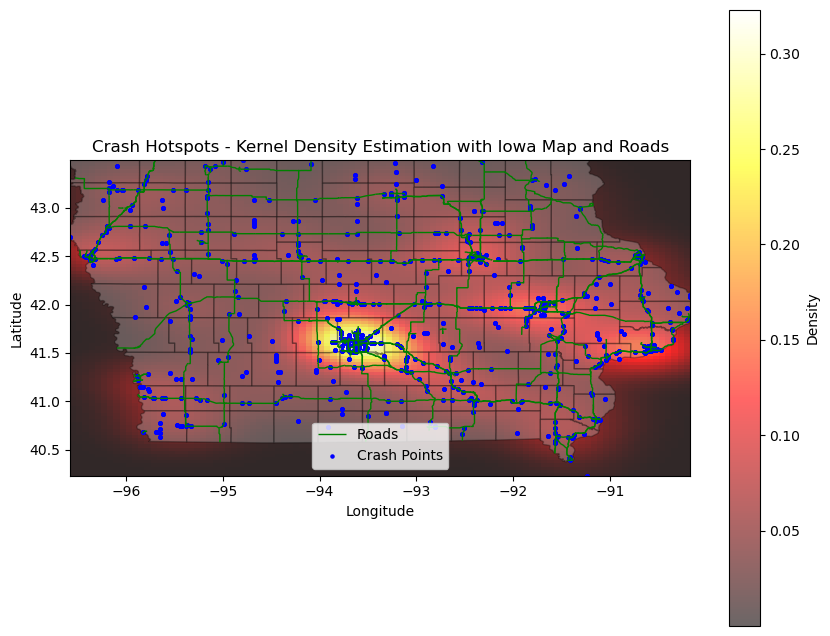

In [ ]:
# Kernal Density Estimation (KDE)
import geopandas as gpd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Load the shapefile for Iowa counties
iowa_map = gpd.read_file('Iowa_County_Boundaries/IowaCounties.shx')
iowa_map = iowa_map.to_crs(epsg=4326)

# Load the roads shapefile (replace 'arterials/arterials.shx' with the correct path)
iowa_road = gpd.read_file('arterials/arterials.shx')
iowa_road = iowa_road.to_crs(epsg=4326)

# Assuming you have a DataFrame with 'latitude' and 'longitude' columns for crash locations
# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(location_df, geometry=gpd.points_from_xy(location_df.LONGITUD, location_df.LATITUDE))

# Extract coordinates as a 2D array (longitude, latitude)
coords = np.vstack([gdf.geometry.x, gdf.geometry.y])

# Apply Kernel Density Estimation
kde = gaussian_kde(coords)

# Create a grid of points to evaluate the KDE
x_min, y_min, x_max, y_max = gdf.total_bounds
xgrid = np.linspace(x_min, x_max, 100)
ygrid = np.linspace(y_min, y_max, 100)
xv, yv = np.meshgrid(xgrid, ygrid)

# Evaluate KDE over the grid
density = kde(np.vstack([xv.ravel(), yv.ravel()]))

# Reshape the density array to match the grid
density = density.reshape(xv.shape)

# Plot the map of Iowa counties with transparency
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the Iowa county boundaries with transparency to show the KDE underneath
iowa_map.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.3)

# Plot the roads shapefile on top of the Iowa county map
iowa_road.plot(ax=ax, color='green', linewidth=1, label='Roads')

# Plot the KDE heatmap on top of the Iowa map and roads
ax.imshow(density, origin='lower', extent=[x_min, x_max, y_min, y_max], cmap='hot', alpha=0.6)

# Overlay the crash points
ax.scatter(gdf.geometry.x, gdf.geometry.y, s=5, color='blue', label='Crash Points')

# Add labels and color bar
plt.colorbar(ax.imshow(density, origin='lower', extent=[x_min, x_max, y_min, y_max], cmap='hot', alpha=0.6), label='Density')
plt.title('Crash Hotspots - Kernel Density Estimation with Iowa Map and Roads')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.show()


In [ ]:
# Develop prediction model for number of fatalities
# List of columns to be used for prediction
selected_columns = [
    'VE_TOTAL', 'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'RUR_URB', 'FUNC_SYS', 'TYP_INT', 'LGT_COND', 'WEATHERNAME', 'DAY', 'MONTH', 'YEAR', 'HOUR', 'MINUTE', 'DAY_WEEKNAME',
    'DRUNK_DR', 'FATALS', 'MAN_COLL', 'WRK_ZONE', 'VEH_NO', 'NUMOCCS', 'BODY_TYP', 'V_CONFIG', 'M_HARM', 'VSURCOND', 'VPAVETYP', 'ACC_TYPE', 'VPROFILE','VTRAFCON'
   # Including 'FATALS' as the target variable
]

# New DataFrame with selected columns only
fatal_df = iowa_df[selected_columns]

# Display the first few rows of the new DataFrame to verify
print(fatal_df.head())

        VE_TOTAL  PEDS  PERSONS  PERMVIT  PERNOTMVIT  RUR_URB  FUNC_SYS  \
482507         2     0        2        2           0        1         3   
482508         2     0        2        2           0        1         3   
482509         2     0        2        2           0        1         3   
482510         2     0        2        2           0        1         3   
482511         2     0        2        2           0        1         3   

        TYP_INT  LGT_COND WEATHERNAME  ...  VEH_NO  NUMOCCS  BODY_TYP  \
482507        2         1       Clear  ...       1        1         4   
482508        2         1       Clear  ...       1        1        34   
482509        2         1       Clear  ...       2        1        66   
482510        2         1       Clear  ...       1        1        66   
482511        2         1       Clear  ...       1        1        34   

        V_CONFIG  M_HARM VSURCOND  VPAVETYP  ACC_TYPE  VPROFILE  VTRAFCON  
482507         0       1        3 

In [ ]:
# Calculate percentage of missing values in each column
missing_percentage = (fatal_df.isnull().sum() / len(fatal_df)) * 100

# Display the percentage of missing values by column
print(missing_percentage)

VE_TOTAL         0.000000
PEDS             0.000000
PERSONS          0.000000
PERMVIT          0.000000
PERNOTMVIT       0.000000
RUR_URB          0.000000
FUNC_SYS         0.000000
TYP_INT          0.000000
LGT_COND         0.000000
WEATHERNAME      0.000000
DAY              0.000000
MONTH            0.000000
YEAR             0.000000
HOUR             0.000000
MINUTE           0.000000
DAY_WEEKNAME     0.000000
DRUNK_DR        40.430972
FATALS           0.000000
MAN_COLL         0.000000
WRK_ZONE         0.000000
VEH_NO           0.000000
NUMOCCS          0.000000
BODY_TYP         0.000000
V_CONFIG         0.000000
M_HARM           0.000000
VSURCOND         0.000000
VPAVETYP         0.000000
ACC_TYPE         0.000000
VPROFILE         0.000000
VTRAFCON         0.000000
dtype: float64


In [ ]:
# Remove the DRUNK_DR (drunk driver) columns from dataset due to the high percentage of missing values
fatal_df= fatal_df.drop(columns=['DRUNK_DR'])

In [ ]:
# Display the list of columns in acc_df
columns_list = fatal_df.columns
print(columns_list)

Index(['VE_TOTAL', 'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'RUR_URB',
       'FUNC_SYS', 'TYP_INT', 'LGT_COND', 'WEATHERNAME', 'DAY', 'MONTH',
       'YEAR', 'HOUR', 'MINUTE', 'DAY_WEEKNAME', 'FATALS', 'MAN_COLL',
       'WRK_ZONE', 'VEH_NO', 'NUMOCCS', 'BODY_TYP', 'V_CONFIG', 'M_HARM',
       'VSURCOND', 'VPAVETYP', 'ACC_TYPE', 'VPROFILE', 'VTRAFCON'],
      dtype='object')


In [ ]:
# Calculate percentage of missing values in each column
missing_percentage = (fatal_df.isnull().sum() / len(fatal_df)) * 100

# Display the percentage of missing values by column
print(missing_percentage)

VE_TOTAL        0.0
PEDS            0.0
PERSONS         0.0
PERMVIT         0.0
PERNOTMVIT      0.0
RUR_URB         0.0
FUNC_SYS        0.0
TYP_INT         0.0
LGT_COND        0.0
WEATHERNAME     0.0
DAY             0.0
MONTH           0.0
YEAR            0.0
HOUR            0.0
MINUTE          0.0
DAY_WEEKNAME    0.0
FATALS          0.0
MAN_COLL        0.0
WRK_ZONE        0.0
VEH_NO          0.0
NUMOCCS         0.0
BODY_TYP        0.0
V_CONFIG        0.0
M_HARM          0.0
VSURCOND        0.0
VPAVETYP        0.0
ACC_TYPE        0.0
VPROFILE        0.0
VTRAFCON        0.0
dtype: float64


In [ ]:
# Test for linearity
# Compute the correlation matrix for numerical features and FATALS
numerical_columns = ['VE_TOTAL', 'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'VEH_NO', 'NUMOCCS']

correlation_matrix = fatal_df[numerical_columns + ['FATALS']].corr()

# Display the correlation between each feature and FATALS
print(correlation_matrix['FATALS'].sort_values(ascending=False))

FATALS        1.000000
PERSONS       0.347017
PERMVIT       0.344142
VEH_NO        0.078512
VE_TOTAL      0.066788
NUMOCCS       0.028027
PERNOTMVIT   -0.058052
PEDS         -0.074325
Name: FATALS, dtype: float64


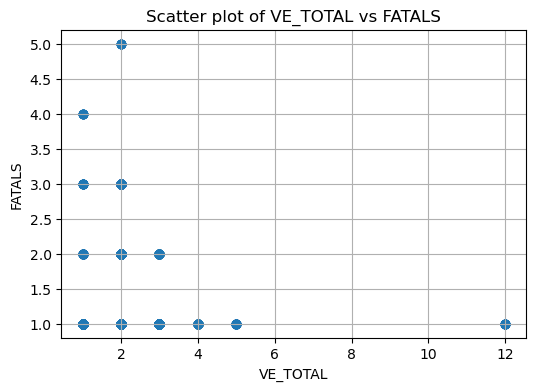

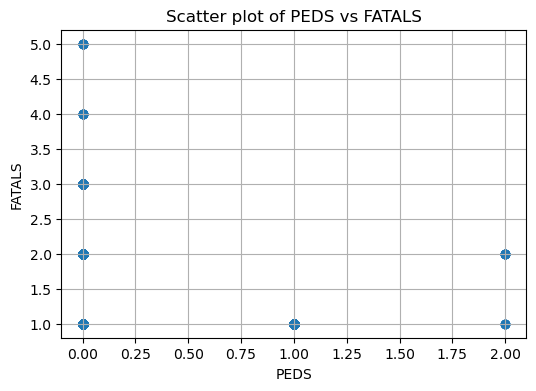

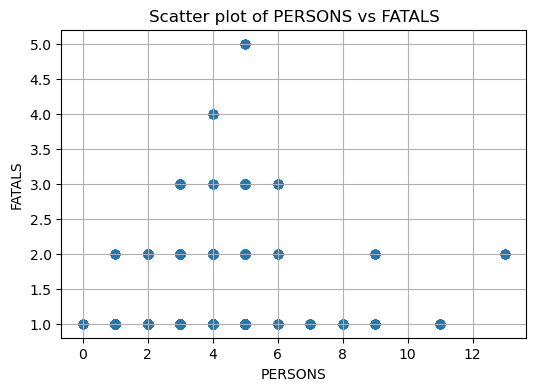

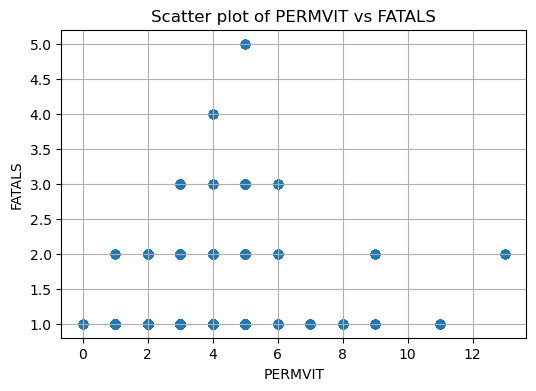

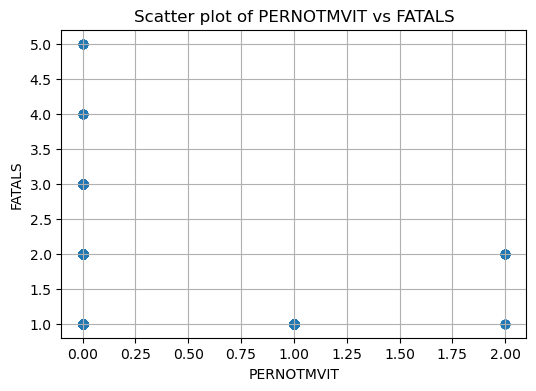

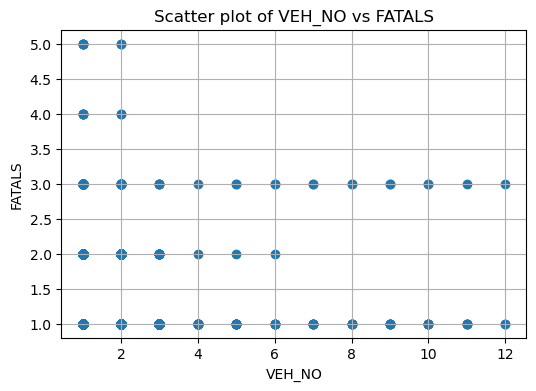

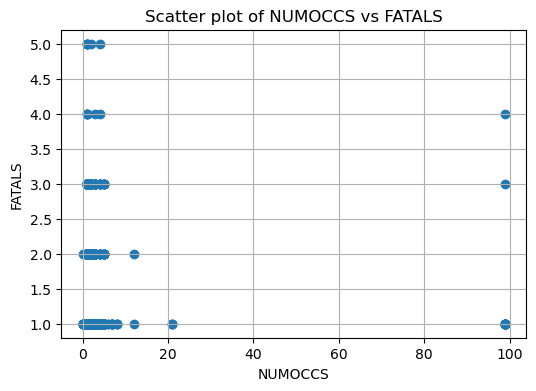

In [ ]:
# List of numerical variables
numerical_columns = ['VE_TOTAL', 'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'NUMOCCS']

# Create scatter plots to visualize linear relationships
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(fatal_df[column], fatal_df['FATALS'])
    plt.title(f'Scatter plot of {column} vs FATALS')
    plt.xlabel(column)
    plt.ylabel('FATALS')
    plt.grid(True)
    plt.show()


In [ ]:
# Since no linear relationship can be found use:
# RandomForest since it can handle non-linear relationships

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Separate Features and Target Variable
X = fatal_df.drop('FATALS', axis=1)  # Features
y = fatal_df['FATALS']  # Target

# Step 2: Identify Numerical and Categorical Columns
numerical_columns = ['VE_TOTAL', 'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'NUMOCCS']
categorical_columns = ['RUR_URB', 'TYP_INT', 'LGT_COND', 'WEATHERNAME', 'DAY_WEEKNAME', 'MONTH', 'YEAR', 'MAN_COLL', 'HOUR',
                      'WRK_ZONE', 'BODY_TYP', 'V_CONFIG', 'M_HARM', 'VSURCOND', 'VPAVETYP', 'ACC_TYPE', 'VPROFILE', 'VTRAFCON']

# Step 3: Preprocessing Pipeline (One-Hot Encoding for Categorical Variables)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Step 4: Define the Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 5: Build the Full Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('model', model)  # Model step
])

# Step 6: Split the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the model
pipeline.fit(X_train, y_train)

# Step 8: Make predictions
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Step 9: Evaluate the model
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)

# Display the evaluation results
print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"R² Score: {r2}")


Train MAE: 0.0076621004566210064
Test MAE: 0.019370437956204384
Train RMSE: 0.03126262302132558
Test RMSE: 0.07431254278113851
R² Score: 0.9651788160816365
